In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install 6

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=8ac014f93f19d43be124f1bb9c9edb585e7beead67192440cf7a78f17539ecfa
  Stored in directory: c:\users\cheng gang wong\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import csv

特徵屬性:['Coupon', 'CoffeeHouse', 'Expiration', 'Passanger', 'Destination', 'Time', 'DirectionSame', 'Occupation', 'Weather', 'Age'],特徵屬性數:10,訓練集準確率:0.853836262323189,測試集準確率:0.652217405801934 ,max_depth=13
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.309152 to fit

(process:8656): GLib-GIO-WARNING **: 01:01:56.617: Unexpectedly, UWP app `Evernote.Evernote_10.47.7.0_x64__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs



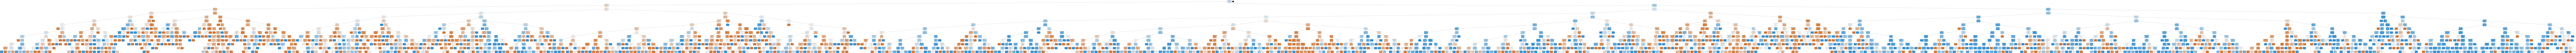

In [17]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import csv
import math
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
#特徵屬性判斷 & 決策樹深度判斷
trainPath=r"Coupon.csv"
rowDataList=[]#原始train資料
import csv
with open(trainPath, "r", newline="") as csvTrain:
  reader = csv.reader(csvTrain)
  for t in reader:
     rowDataList.append(t)
train=[]
test=[]
#訓練集、測試集分割(7:3)
for t in range(1,len(rowDataList)):
    if(t<len(rowDataList)*7/10):
        train.append(rowDataList[t])
    else:
        test.append(rowDataList[t])
     

featureName=[]#特徵欄位名稱
for f in range(0,len(rowDataList[0])):
    featureName.append(rowDataList[0][f])
    
trainFeature=[]#train特徵
trainClass=[]#train類別
for i in range(1,len(train)):
    trainClass.append(train[i][len(train[i])-1])
    rowData=[]
    for r in range(0,len(train[i])-1):
        rowData.append(train[i][r])
    trainFeature.append(rowData)
import math
testFeature=[]#test特徵
testClass=[]#test類別
for i in range(1,len(test)):
    testClass.append(test[i][len(test[i])-1])
    rowData=[]
    for r in range(0,len(test[i])-1):
        rowData.append(test[i][r])
    testFeature.append(rowData)

#Gini Split計算
featureGini=[]
for c in range(0,len(trainFeature[0])):
    gini=[]
    for r in range(0,len(trainFeature)):
        is0=0
        is1=0
        if (trainClass[r]=="0"):
            is0=1
        if (trainClass[r]=="1"):
            is1=1
        isHave=False
        for g in range(0,len(gini)):
            if(gini[g][1]==trainFeature[r][c]):
                gini[g][2]+=is0
                gini[g][3]+=is1
                isHave=True
                break
        if(isHave==False):
            gini.append([c,trainFeature[r][c],is0,is1])
    totalCount=0
    columnGini=[]
    for g in range(0,len(gini)):
        total=gini[g][2]+gini[g][3]
        totalCount+=total
        giniNum=1-(math.pow(gini[g][2]/total,2))-(math.pow(gini[g][3]/total,2))
        columnGini.append([giniNum,total])
    giniSplit=0
    for g in range(0,len(columnGini)):
        giniSplit+=columnGini[g][0]*columnGini[g][1]/totalCount
    featureGini.append([c,giniSplit])

sort=[]
for f in range(0,len(featureGini)):
    sort.append(featureGini[f][1])
sort.sort()

orderFeature=[]
for s in range(0,len(sort)):
    for g in range(0,len(featureGini)):
        if(sort[s]==featureGini[g][1]):
            orderFeature.append(featureGini[g][0])
            break

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
isAcc=False
fn=[]  
#最佳特徵屬性
for o in range(3,len(orderFeature)):
    
    #欄位排序過的train
    orderTrain=[]
    for t in range(0,len(trainFeature)):
        data=[]
        for o2 in range(0,o):
            data.append(trainFeature[t][orderFeature[o2]])
        orderTrain.append(data)
    
    #欄位排序過的test
    orderTest=[]
    for t in range(0,len(testFeature)):
        data=[]
        for o2 in range(0,o):
            data.append(testFeature[t][orderFeature[o2]])
        orderTest.append(data)
        
    fn=[]    
    for t in range(0,o):
        fn.append(featureName[orderFeature[t]])
        
    isCheck=False
    #決策樹深度
    for d in range(3,21):
        iris = load_iris()
        clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=d)
        clf = clf.fit(orderTrain, trainClass)
        
        trainPredred=clf.predict(orderTrain)
        acc=accuracy_score(trainClass, trainPredred)
        
        testPredred=clf.predict(orderTest)
        accTest=accuracy_score(testClass, testPredred)
        if( acc>=0.85 and accTest>=0.65):
            print("特徵屬性:"+str(fn)+",特徵屬性數:"+str(o)+",訓練集準確率:"+str(acc)+",測試集準確率:"+str(accTest)+" ,max_depth="+str(d))
            isCheck=True
            break
    if(isCheck==True):
        break
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = fn,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())
